# Sum of pair of numbers from `a[]` equal to `x`

**References:**
- https://www.geeksforgeeks.org/given-an-array-a-and-a-number-x-check-for-pair-in-a-with-sum-as-x/
- https://www.geeksforgeeks.org/count-pairs-with-given-sum/
- https://stackoverflow.com/questions/4720271/find-a-pair-of-elements-from-an-array-whose-sum-equals-a-given-number
- http://www.techiedelight.com/find-pair-with-given-sum-array/

Given an array A[] and a number x, check for pair in A[] with sum as x

Write a program that, given an array A[] of n numbers and another number x, determines whether or not there exist two elements in S whose sum is exactly x. 

In [1]:
import numpy as np
import scipy.stats
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
%matplotlib inline

In [2]:
def create_matrix(a):

    M = np.add.outer(a,a)
    return M

In [3]:
def create_imshow_matrix(a):
    
    n = len(a)
    M = create_matrix(a)
    f,ax = plt.subplots()
    im = ax.imshow(M, origin='upper')
    cb = f.colorbar(im)
    cb.set_label('Sum')
    ax.set_xticks(range(n));
    ax.set_yticks(range(n));
    
    
    for i in range(n):
        for j in range(i, n, 1):
            ax.text(j,i, M[i,j], fontsize=10, verticalalignment='center', horizontalalignment='center')
            
    
    dummy = np.array( [(xi,xi) for xi in range(n)] )
    x = np.insert(dummy.flatten()+0.5, 0, -0.5, axis=0)[:-1]
    y = dummy.flatten()+0.5
    ax.plot(x,y,linewidth=1, c='k')

    
    return f,ax

In [4]:
def create_barplot(a):
    
    M = np.add.outer(a,a)
    f = plt.figure(figsize=(8, 6))
    ax = f.add_subplot(111, projection='3d')

    _x = np.arange(n)
    _y = np.arange(n)
    _xx, _yy = np.meshgrid(_x, _y)
    x, y = _xx.ravel(), _yy.ravel()

    M_min = min(M.ravel())

    top = M.ravel()
    top += abs(M_min)
    
    width = 1
    depth = 1
    bottom = np.zeros_like(top)
    ax.bar3d(x,y, bottom, width, depth, top, shade=True)
    
    return f,ax

In [5]:
def bounded_search(a, target):
    """O(n log(n)) time for unsorted arrays"""
    
    a.sort()
    n = len(a)
    M = create_matrix(a)
    
    index_start = (0,n-1)
    index = index_start
    
    steps = []
    steps.append(index_start)
    
    found = False
    
    while not found:
        
        v = M[index]
        if v == target:
            found = True
            break
        
        if target < v:
            index = (index[0], index[1]-1)
        if target > v:
            index = (index[0]+1, index[1])
    
        steps.append(index)
    
    return steps

In [6]:
def bounded_search_quick(a, target):
    """O(n log(n)) time for unsorted arrays"""
    
    a.sort()
    n = len(a)
    
    index_start = (0,n-1)
    index = index_start

    
    found = False
    
    while not found:
        
        i,j = index[0], index[1]
        v = a[i] + a[j]
        if v == target:
            found = True
            return i,j
        
        if target < v:
            index = (i, j-1)
        if target > v:
            index = (i+1, j)
        


In [7]:
def show_iterations(a, search_algo, target):
    
    M = create_matrix(a)
    f,ax = create_imshow_matrix(a)
    
    iterations = search_algo(a,target)
    for it in iterations:
        square = mpatches.Rectangle(xy=(it[1]-0.5,it[0]-0.5), width=1, height=1, facecolor=None, edgecolor='k')
        ax.add_patch(square)
    return f,ax

In [8]:
def hash_search(a,target):
    
    remainder_index_dict = {}

    for i,ai in enumerate(a):
    
        looking_for_remainder_like_this = target - ai

        if looking_for_remainder_like_this in remainder_index_dict:
            j = remainder_index_dict[looking_for_remainder_like_this]
            return i,j

        remainder_index_dict[ai] = i

In [9]:
n = 10
a = scipy.stats.randint.rvs(low=-100, high=100, size=n)
a.sort()
M = np.add.outer(a,a,)

In [10]:
M

array([[-200, -196, -182, -181, -173, -158, -153, -137, -127,  -53],
       [-196, -192, -178, -177, -169, -154, -149, -133, -123,  -49],
       [-182, -178, -164, -163, -155, -140, -135, -119, -109,  -35],
       [-181, -177, -163, -162, -154, -139, -134, -118, -108,  -34],
       [-173, -169, -155, -154, -146, -131, -126, -110, -100,  -26],
       [-158, -154, -140, -139, -131, -116, -111,  -95,  -85,  -11],
       [-153, -149, -135, -134, -126, -111, -106,  -90,  -80,   -6],
       [-137, -133, -119, -118, -110,  -95,  -90,  -74,  -64,   10],
       [-127, -123, -109, -108, -100,  -85,  -80,  -64,  -54,   20],
       [ -53,  -49,  -35,  -34,  -26,  -11,   -6,   10,   20,   94]])

In [11]:
s_random1 = np.random.choice(M.flatten())
s_random2 = np.random.choice(M.flatten())
s_random1, s_random2

(-154, -153)

In [12]:
bounded_search(a, s_random1)

[(0, 9), (0, 8), (0, 7), (0, 6), (0, 5), (1, 5)]

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe9f92bf198>)

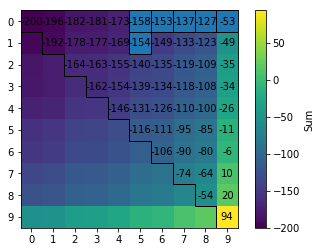

In [13]:
show_iterations(a, search_algo=bounded_search, target=s_random1)

In [14]:
hash_search(a, target=s_random1)

(4, 3)

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe9f6c4b438>)

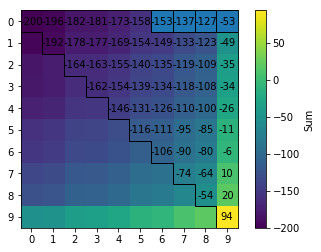

In [15]:
show_iterations(a, search_algo=bounded_search, target=s_random2)

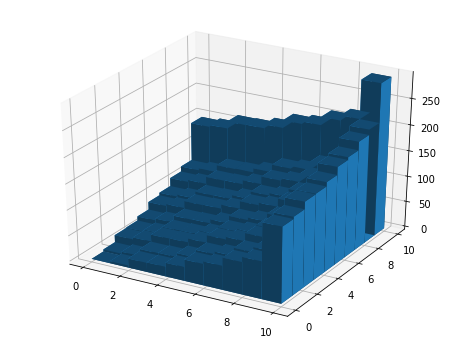

In [16]:
f,ax = create_barplot(a)

In [17]:
#ax.bar3d(5,5,0,1,1,400,color='red')

In [18]:
a.round

<function ndarray.round>

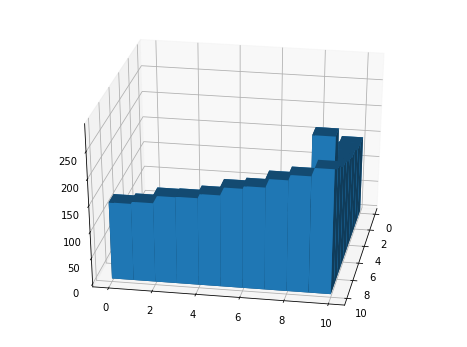

In [19]:
ax.view_init(30, 10)
f

## Testing scaling

Varies depending on the choice of targets!!

In [20]:
def profile_scaling(arrays,targets,search_algo):

    ns = []
    dts = []
    
    for a,t in zip(arrays,targets):
        n = len(a)

        start = time.time()
        search_algo(a,t)
        stop = time.time()
        dt = stop-start

        ns = np.append(ns,n)
        dts.append(dt)
    
    return ns, dts

In [21]:
def generate_benchmark(ns, iterations=30):
    
    b_ns_all  = []
    b_dts_all = []
    h_ns_all  = []
    h_dts_all = []
    
    for it in range(iterations):
        arrays = [scipy.stats.randint.rvs(low=-10000, high=10000, size=int(n)) for n in ns]
        targets = [np.random.choice(a) + np.random.choice(a) for a in arrays]
        b_ns, b_dts = profile_scaling(arrays,targets,search_algo=bounded_search_quick)
        h_ns, h_dts = profile_scaling(arrays,targets,search_algo=hash_search)

        b_ns_all.append(b_ns)
        b_dts_all.append(b_dts)
        h_ns_all.append(h_ns)
        h_dts_all.append(h_dts)
        
    return b_ns_all, b_dts_all, h_ns_all, h_dts_all

In [22]:
ns = np.logspace(start=1, stop=5, num=8)

In [23]:
arrays = [scipy.stats.randint.rvs(low=-10000, high=10000, size=int(n)) for n in ns]

In [24]:
targets = [np.random.choice(a) + np.random.choice(a) for a in arrays]

In [25]:
#bounded_ns, bounded_dts = profile_scaling(arrays,targets,search_algo=bounded_search)
bounded_qck_ns, bounded_qck_dts = profile_scaling(arrays,targets,search_algo=bounded_search_quick)
hash_ns, hash_dts = profile_scaling(arrays,targets,search_algo=hash_search)

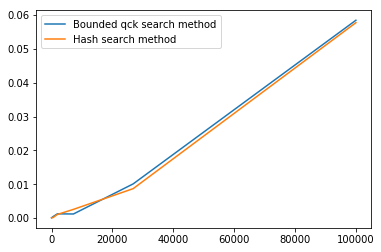

In [26]:
f,ax = plt.subplots()
#ax.plot(bounded_ns,bounded_dts, label='Bounded search method')
ax.plot(bounded_qck_ns,bounded_qck_dts, label='Bounded qck search method')
ax.plot(hash_ns, hash_dts, label='Hash search method')
ax.legend()

In [27]:
b_ns_all, b_dts_all, h_ns_all, h_dts_all = generate_benchmark(ns)

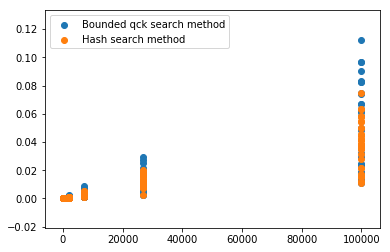

In [28]:
f,ax = plt.subplots()
ax.scatter(b_ns_all, b_dts_all, label='Bounded qck search method')
ax.scatter(h_ns_all, h_dts_all, label='Hash search method')
ax.legend()

## Test area

In [29]:
a

array([-100,  -96,  -82,  -81,  -73,  -58,  -53,  -37,  -27,   47])

In [30]:
M

array([[-200, -196, -182, -181, -173, -158, -153, -137, -127,  -53],
       [-196, -192, -178, -177, -169, -154, -149, -133, -123,  -49],
       [-182, -178, -164, -163, -155, -140, -135, -119, -109,  -35],
       [-181, -177, -163, -162, -154, -139, -134, -118, -108,  -34],
       [-173, -169, -155, -154, -146, -131, -126, -110, -100,  -26],
       [-158, -154, -140, -139, -131, -116, -111,  -95,  -85,  -11],
       [-153, -149, -135, -134, -126, -111, -106,  -90,  -80,   -6],
       [-137, -133, -119, -118, -110,  -95,  -90,  -74,  -64,   10],
       [-127, -123, -109, -108, -100,  -85,  -80,  -64,  -54,   20],
       [ -53,  -49,  -35,  -34,  -26,  -11,   -6,   10,   20,   94]])

In [31]:
target = 75

In [32]:
remainder = target - a

In [33]:
z = [remainder,a]

In [34]:
z

[array([175, 171, 157, 156, 148, 133, 128, 112, 102,  28]),
 array([-100,  -96,  -82,  -81,  -73,  -58,  -53,  -37,  -27,   47])]

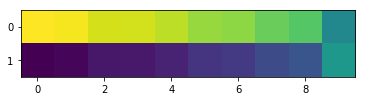

In [35]:
f,ax = plt.subplots()
ax.imshow(z)